# Solutions to Exercise 3

This notebook contains solutions to [Exercise 3](../Exercise%203.ipynb).

<br><br><br><br>

## a) Find variables in the Decennial Public Law 94 171 data set

We are interested in knowing what variables we need to determine the fraction of 
the population in an area that is Hispanic or Latino. We want this data for the
year 2020.

We need two variables, the total population and the Hispanic or Latino population.
We can then divide them to get the fraction.

In [1]:
import censusdis.data as ced
import censusdis.maps as cem
from censusdis.datasets import DECENNIAL_PUBLIC_LAW_94_171
import censusdis.states as states

import pandas as pd

pd.set_option("max_colwidth", 200)

### Try a first search

In [2]:
df_hispanic_latino_vars = ced.variables.search(
    DECENNIAL_PUBLIC_LAW_94_171, 2020, pattern="hispanic|latino"
)

df_hispanic_latino_vars

,YEAR,DATASET,GROUP,VARIABLE,LABEL,SUGGESTED_WEIGHT,VALUES
0,2020,dec/pl,P2,P2_002N,!!Total:!!Hispanic or Latino,NaN,None
1,2020,dec/pl,P2,P2_003N,!!Total:!!Not Hispanic or Latino:,NaN,None
2,2020,dec/pl,P2,P2_004N,!!Total:!!Not Hispanic or Latino:!!Population of one race:,NaN,None
3,2020,dec/pl,P2,P2_005N,!!Total:!!Not Hispanic or Latino:!!Population of one race:!!White alone,NaN,None
4,2020,dec/pl,P2,P2_006N,!!Total:!!Not Hispanic or Latino:!!Population of one race:!!Black or African American alone,NaN,None
...,...,...,...,...,...,...,...
139,2020,dec/pl,P4,P4_069N,!!Total:!!Not Hispanic or Latino:!!Population of two or more races:!!Population of five races:!!White; Black or African American; Asian; Native Hawaiian and Other Pacific Islander; Some Other Race,NaN,None
140,2020,dec/pl,P4,P4_070N,!!Total:!!Not Hispanic or Latino:!!Population of two or more races:!!Population of five races:!!White; American Indian and Alaska Native; Asian; Native Hawaiian and Other Pacific Islander; Some O...,NaN,None
141,2020,dec/pl,P4,P4_071N,!!Total:!!Not Hispanic or Latino:!!Population of two or more races:!!Population of five races:!!Black or African American; American Indian and Alaska Native; Asian; Native Hawaiian and Other Paci...,NaN,None
142,2020,dec/pl,P4,P4_072N,!!Total:!!Not Hispanic or Latino:!!Population of two or more races:!!Population of six races:,NaN,None


### What is group P2?

The first variable in the search results above, `P2_002N` looks like it might be part of what we want.
Let's check the description of P2 and of other groups and see.

In [3]:
ced.variables.search_groups(DECENNIAL_PUBLIC_LAW_94_171, 2020)

,DATASET,YEAR,GROUP,DESCRIPTION
0,dec/pl,2020,H1,OCCUPANCY STATUS
1,dec/pl,2020,P1,RACE
2,dec/pl,2020,P2,"HISPANIC OR LATINO, AND NOT HISPANIC OR LATINO BY RACE"
3,dec/pl,2020,P3,RACE FOR THE POPULATION 18 YEARS AND OVER
4,dec/pl,2020,P4,"HISPANIC OR LATINO, AND NOT HISPANIC OR LATINO BY RACE FOR THE POPULATION 18 YEARS AND OVER"
5,dec/pl,2020,P5,GROUP QUARTERS POPULATION BY MAJOR GROUP QUARTERS TYPE


### Alternatively, we could have done this first search at the group level

In [4]:
df_hispanic_latino_groups = ced.variables.search_groups(
    DECENNIAL_PUBLIC_LAW_94_171, 2020, pattern="hispanic|latino"
)

df_hispanic_latino_groups

,DATASET,YEAR,GROUP,DESCRIPTION
0,dec/pl,2020,P2,"HISPANIC OR LATINO, AND NOT HISPANIC OR LATINO BY RACE"
1,dec/pl,2020,P4,"HISPANIC OR LATINO, AND NOT HISPANIC OR LATINO BY RACE FOR THE POPULATION 18 YEARS AND OVER"


### Look at the tree

In [5]:
ced.variables.group_tree(DECENNIAL_PUBLIC_LAW_94_171, 2020, "P2")

+ Geography (GEO_ID)
+ Geographic Area Name (NAME)
+  
    + Total: (P2_001N)
        + Hispanic or Latino (P2_002N)
        + Not Hispanic or Latino: (P2_003N)
            + Population of one race: (P2_004N)
                + White alone (P2_005N)
                + Black or African American alone (P2_006N)
                + American Indian and Alaska Native alone (P2_007N)
                + Asian alone (P2_008N)
                + Native Hawaiian and Other Pacific Islander alone (P2_009N)
                + Some Other Race alone (P2_010N)
            + Population of two or more races: (P2_011N)
                + Population of two races: (P2_012N)
                    + White; Black or African American (P2_013N)
                    + White; American Indian and Alaska Native (P2_014N)
                    + White; Asian (P2_015N)
                    + White; Native Hawaiian and Other Pacific Islander (P2_016N)
                    + White; Some Other Race (P2_017N)
                    + Blac

This looks like a very unbalanced tree. On one side of the root, there is `P2_002N`, which is hispanic or latino. On the other side, not Hispanic or Latino is further subdivided by race.

This is what the name of the group `P2` implied. 

### Now we know the variables we want, P2_001N and P2_002N

In [6]:
VARIABLE_TOTAL = "P2_001N"
VARIABLE_HISPANIC_OR_LATINO = "P2_002N"

## b) Determine the fraction of the population that is Hispanic or Latino in California by County

### Query the Data

In [7]:
gdf_data = ced.download(
    DECENNIAL_PUBLIC_LAW_94_171,
    2020,
    ["NAME", VARIABLE_HISPANIC_OR_LATINO, VARIABLE_TOTAL],
    state=states.CA,
    county="*",
    with_geometry=True,
)

### Compute the Fraction

In [8]:
FRACTION_HISPANIC_OR_LATINO = f"frac_{VARIABLE_HISPANIC_OR_LATINO}"

gdf_data[FRACTION_HISPANIC_OR_LATINO] = (
    gdf_data[VARIABLE_HISPANIC_OR_LATINO] / gdf_data[VARIABLE_TOTAL]
)

### Plot

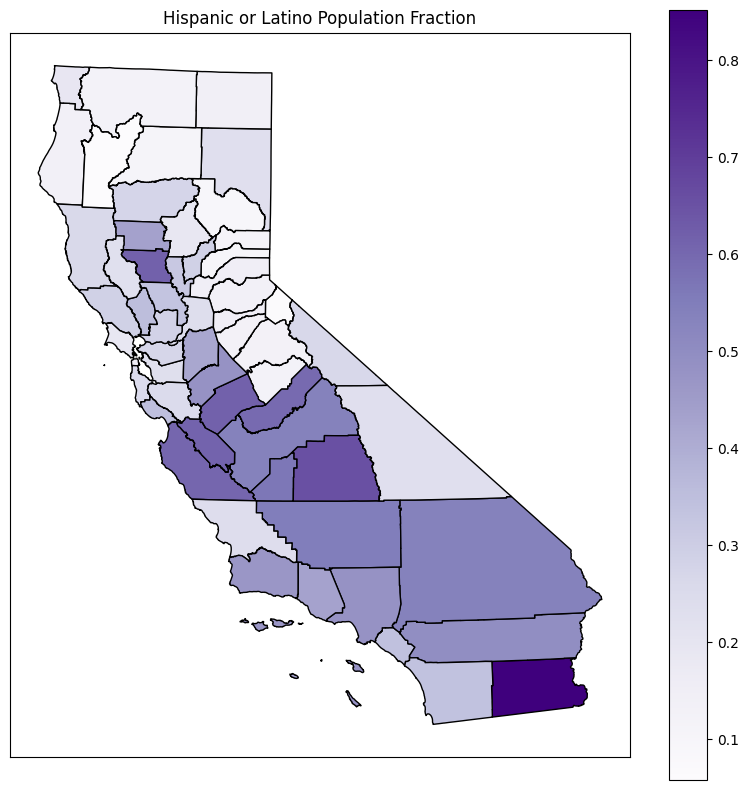

In [9]:
ax = cem.plot_map(
    gdf_data,
    FRACTION_HISPANIC_OR_LATINO,
    legend=True,
    cmap="Purples",
    edgecolor="black",
    figsize=(10, 10),
)

_ = ax.set_title("Hispanic or Latino Population Fraction")